# **Project Name**    - **Local Food Wastage Management System**

# **Project Summary**

Food wastage is a significant issue, with many households and restaurants discarding surplus food while numerous people struggle with food insecurity. This project aims to develop a Local Food Wastage Management System, where:
Restaurants and individuals can list surplus food.
NGOs or individuals in need can claim the food.
SQL stores available food details and locations.
A Streamlit app enables interaction, filtering, CRUD operation and visualization.


To start with project here are few steps-

# 1) Understand the Problem Statement -

* Food wastage is a major issue: households, restaurants, and grocery stores often discard surplus food.

* At the same time, many people face food insecurity and lack access to nutritious meals.

* There is a gap between food providers and food receivers.

* Food Providers & Receivers

How many food providers and receivers exist in each city?

Which type of food provider (restaurant, grocery store, etc.) contributes the most food?

What is the contact information of food providers in a specific city?

Which receivers have claimed the most food?

* Food Listings & Availability

What is the total quantity of food available from all providers?

Which city has the highest number of food listings?

What are the most commonly available food types?

* Claims & Distribution

How many food claims have been made for each food item?

Which provider has had the highest number of successful food claims?

What percentage of food claims are completed vs. pending vs. canceled?

* Analysis & Insights

What is the average quantity of food claimed per receiver?

Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

What is the total quantity of food donated by each provider?

# 2) Data Collection -

 We have given uber datasets

**File details:**

* **Providers Dataset : providers_data.csv**

* **Receivers Dataset : receivers_data.csv**

* **Food Listings Dataset : food_listings_data.csv**

* **Claims Dataset : claims_data.csv**

---



**Columns details:**



Below are the key columns present in each sheet of the Excel files

**1. Providers Dataset**

The providers.csv file contains details of food providers who contribute surplus food to the system.

Provider_ID (Integer) – Unique identifier for each provider.

Name (String) – Name of the food provider (e.g., restaurants, grocery stores, supermarkets).

Type (String) – Category of provider (e.g., Restaurant, Grocery Store, Supermarket).

Address (String) – Physical address of the provider.

City (String) – City where the provider is located.

Contact (String) – Contact information (e.g., phone number).

**2. Receivers Dataset**

The receivers.csv file contains details of individuals or organizations receiving food.

Receiver_ID (Integer) – Unique identifier for each receiver.

Name (String) – Name of the receiver (individual or organization).

Type (String) – Category of receiver (e.g., NGO, Community Center, Individual).

City (String) – City where the receiver is located.

Contact (String) – Contact details (e.g., phone number).

**3. Food Listings Dataset**

The food_listings.csv file stores details of available food items that can be claimed by receivers.

Food_ID (Integer) – Unique identifier for each food item.

Food_Name (String) – Name of the food item.

Quantity (Integer) – Quantity available for distribution.

Expiry_Date (Date) – Expiry date of the food item.

Provider_ID (Integer) – Reference to the provider offering the food.

Provider_Type (String) – Type of provider offering the food.

Location (String) – City where the food is available.

Food_Type (String) – Category of food (e.g., Vegetarian, Non-Vegetarian, Vegan).

Meal_Type (String) – Type of meal (e.g., Breakfast, Lunch, Dinner, Snacks).

**4. Claims Dataset**

The claims.csv file tracks food claims made by receivers.

Claim_ID (Integer) – Unique identifier for each claim.

Food_ID (Integer) – Reference to the food item being claimed.

Receiver_ID (Integer) – Reference to the receiver claiming the food.

Status (String) – Current status of the claim (e.g., Pending, Completed, Cancelled).

Timestamp (Datetime) – Date and time when the claim was made.






# 3) Data Cleaning -

After this, check the data types, nulls values and than replace the null values, than remove the duplicate rows.

# 4) Data Analysis -

After cleaning  the datasets, do some Exploratory Data Analysis (EDA), Univariate, Bivariate, Multivariate Analysis with the datasets to extract the useful insights.


# 5) Data Visualisation -

For visualisation use histogram chart, box plot, line chart, bar chart, clustered column chart, pie chart, correlation heatmap and pairplot to visualise the dataset.







# **Github Link**

https://github.com/SainiBimal/Local-Food-Wastage-Management-System

# **Data Wrangling**

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
import sqlite3

In [128]:
# Load all files

claim = pd.read_csv("/content/drive/MyDrive/Food/claims_data.csv")
foodlist = pd.read_csv("/content/drive/MyDrive/Food/food_listings_data.csv")
provider = pd.read_csv("/content/drive/MyDrive/Food/providers_data.csv")
receiver = pd.read_csv("/content/drive/MyDrive/Food/receivers_data.csv")


In [129]:
claim.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


In [130]:
foodlist.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


In [131]:
provider.head()

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


In [132]:
receiver.head()

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154


In [133]:
# Checking for Null values

claim.isnull().sum(), foodlist.isnull().sum(),provider.isnull().sum(),receiver.isnull().sum()

(Claim_ID       0
 Food_ID        0
 Receiver_ID    0
 Status         0
 Timestamp      0
 dtype: int64,
 Food_ID          0
 Food_Name        0
 Quantity         0
 Expiry_Date      0
 Provider_ID      0
 Provider_Type    0
 Location         0
 Food_Type        0
 Meal_Type        0
 dtype: int64,
 Provider_ID    0
 Name           0
 Type           0
 Address        0
 City           0
 Contact        0
 dtype: int64,
 Receiver_ID    0
 Name           0
 Type           0
 City           0
 Contact        0
 dtype: int64)

In [134]:
# Checking for duplicates

claim.duplicated().sum(), foodlist.duplicated().sum(),provider.duplicated().sum(),receiver.duplicated().sum()

(np.int64(0), np.int64(0), np.int64(0), np.int64(0))

In [135]:
# Checking for data types

claim.dtypes, foodlist.dtypes,provider.dtypes,receiver.dtypes

(Claim_ID        int64
 Food_ID         int64
 Receiver_ID     int64
 Status         object
 Timestamp      object
 dtype: object,
 Food_ID           int64
 Food_Name        object
 Quantity          int64
 Expiry_Date      object
 Provider_ID       int64
 Provider_Type    object
 Location         object
 Food_Type        object
 Meal_Type        object
 dtype: object,
 Provider_ID     int64
 Name           object
 Type           object
 Address        object
 City           object
 Contact        object
 dtype: object,
 Receiver_ID     int64
 Name           object
 Type           object
 City           object
 Contact        object
 dtype: object)

In [136]:
pd.set_option("display.max_columns", None)

In [137]:
provider.rename(columns={"Name": "Provider_Name", "Type" : "Provider_Type" , "City" : "Provider_City", "Contact" : "Provider_Contact"}, inplace=True)
receiver.rename(columns={"Name": "Receiver_Name", "Type" : "Receiver_Type" , "City" : "Receiver_City", "Contact" : "Receiver_Contact"}, inplace=True)

In [138]:
# Merge all dataset

food_provider = pd.merge(foodlist, provider, on="Provider_ID", how="inner")
claim_receiver = pd.merge(claim, receiver, on="Receiver_ID", how="inner")
full_data = pd.merge(claim_receiver, food_provider, on="Food_ID", how="inner")

full_data = full_data.drop(columns = "Provider_Type_y")
full_data = full_data.rename(columns = {"Provider_Type_x" : "Provider_Type"})
full_data.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp,Receiver_Name,Receiver_Type,Receiver_City,Receiver_Contact,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type,Provider_Name,Address,Provider_City,Provider_Contact
0,1,164,908,Pending,3/5/2025 5:26,Abigail Crawford,NGO,Lake Shawn,(010)152-8668,Dairy,22,3/27/2025,432,Restaurant,Carolchester,Vegan,Dinner,Meyer and Sons,08209 Eaton Streets Apt. 968\nSouth Laurenside...,Carolchester,001-738-662-6338
1,2,353,391,Cancelled,3/11/2025 10:24,Regina Munoz,NGO,Lake Clinton,585.955.3149,Fruits,5,3/29/2025,418,Restaurant,Deborahfurt,Non-Vegetarian,Lunch,"Schwartz, Odonnell and Padilla","23011 Barnett Falls Apt. 524\nWest Cameron, WY...",Deborahfurt,955-658-8107x92494
2,3,626,492,Completed,3/21/2025 0:59,Julie Lewis,NGO,South Steven,(557)352-3497x4606,Salad,37,3/29/2025,274,Supermarket,New Dawnborough,Non-Vegetarian,Breakfast,Shields-Moore,"922 Bailey Overpass Suite 885\nNew William, VA...",New Dawnborough,9332911651
3,4,61,933,Cancelled,3/4/2025 9:08,Jodi Lee,NGO,West Paulfort,3517962649,Fruits,33,3/22/2025,243,Catering Service,West Catherine,Vegetarian,Lunch,Davis-Hurley,"687 Sparks Forks\nEast Patricia, NC 25546",West Catherine,(172)389-0239x87614
4,5,345,229,Pending,3/14/2025 15:17,Tina Watkins,Shelter,Bushview,7774795306,Pasta,14,3/20/2025,346,Grocery Store,Thomasville,Vegan,Lunch,"Phillips, Wolfe and Martin",Unit 1376 Box 6294\nDPO AE 62072,Thomasville,001-548-413-4962


In [139]:
# Checking for null values

full_data.isnull().sum()

,0
Claim_ID,0
Food_ID,0
Receiver_ID,0
Status,0
Timestamp,0
Receiver_Name,0
Receiver_Type,0
Receiver_City,0
Receiver_Contact,0
Food_Name,0


In [140]:
# Checking for duplicates

full_data.dtypes

,0
Claim_ID,int64
Food_ID,int64
Receiver_ID,int64
Status,object
Timestamp,object
Receiver_Name,object
Receiver_Type,object
Receiver_City,object
Receiver_Contact,object
Food_Name,object


In [141]:
# Change the data types

full_data["Timestamp"] = pd.to_datetime(full_data["Timestamp"])
full_data["Expiry_Date"] = pd.to_datetime(full_data["Expiry_Date"])

full_data.dtypes

,0
Claim_ID,int64
Food_ID,int64
Receiver_ID,int64
Status,object
Timestamp,datetime64[ns]
Receiver_Name,object
Receiver_Type,object
Receiver_City,object
Receiver_Contact,object
Food_Name,object


In [142]:
# Feature Engineering


full_data["Days_To_Expiry"] = (full_data["Expiry_Date"] - full_data["Timestamp"]).dt.days
full_data["Hour"] = full_data["Timestamp"].dt.hour
full_data["Day"] = full_data["Timestamp"].dt.day

In [143]:
# Checking for duplicates

full_data.duplicated().sum()

np.int64(0)

In [144]:
# Shape of data

full_data.shape

(1000, 24)

In [145]:
# Information of data

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Claim_ID          1000 non-null   int64         
 1   Food_ID           1000 non-null   int64         
 2   Receiver_ID       1000 non-null   int64         
 3   Status            1000 non-null   object        
 4   Timestamp         1000 non-null   datetime64[ns]
 5   Receiver_Name     1000 non-null   object        
 6   Receiver_Type     1000 non-null   object        
 7   Receiver_City     1000 non-null   object        
 8   Receiver_Contact  1000 non-null   object        
 9   Food_Name         1000 non-null   object        
 10  Quantity          1000 non-null   int64         
 11  Expiry_Date       1000 non-null   datetime64[ns]
 12  Provider_ID       1000 non-null   int64         
 13  Provider_Type     1000 non-null   object        
 14  Location          1000 no

In [146]:
# Statistical analysis

full_data.describe()

,Claim_ID,Food_ID,Receiver_ID,Timestamp,Quantity,Expiry_Date,Provider_ID,Days_To_Expiry,Hour,Day
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,502.163000,492.437000,2025-03-11 11:20:59.400000,25.959000,2025-03-22 21:01:26.400000,480.956000,10.886000,11.092000,10.990000
min,1.000000,1.000000,1.000000,2025-03-01 00:09:00,1.000000,2025-03-16 00:00:00,1.000000,-6.000000,0.000000,1.000000
25%,250.750000,233.750000,256.000000,2025-03-06 17:42:15,13.000000,2025-03-19 00:00:00,235.000000,6.000000,5.000000,6.000000
50%,500.500000,504.500000,480.500000,2025-03-11 16:08:00,26.000000,2025-03-23 00:00:00,473.000000,11.000000,11.000000,11.000000
75%,750.250000,762.000000,742.250000,2025-03-16 09:29:45,38.250000,2025-03-27 00:00:00,723.000000,16.000000,17.000000,16.000000
max,1000.000000,999.000000,1000.000000,2025-03-21 06:12:00,50.000000,2025-03-30 00:00:00,999.000000,28.000000,23.000000,21.000000
std,288.819436,292.462255,284.487869,NaN,14.351909,NaN,287.900248,7.137783,7.019459,5.771587


In [147]:
#Export clean data for SQL and Streamlit

from google.colab import files

full_data.to_csv("full_data.csv", index=False)
files.download("full_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
full_data.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp,Receiver_Name,Receiver_Type,Receiver_City,Receiver_Contact,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type,Provider_Name,Address,Provider_City,Provider_Contact,Days_To_Expiry,Hour,Day
0,1,164,908,Pending,2025-03-05 05:26:00,Abigail Crawford,NGO,Lake Shawn,(010)152-8668,Dairy,22,2025-03-27,432,Restaurant,Carolchester,Vegan,Dinner,Meyer and Sons,08209 Eaton Streets Apt. 968\nSouth Laurenside...,Carolchester,001-738-662-6338,21,5,5
1,2,353,391,Cancelled,2025-03-11 10:24:00,Regina Munoz,NGO,Lake Clinton,585.955.3149,Fruits,5,2025-03-29,418,Restaurant,Deborahfurt,Non-Vegetarian,Lunch,"Schwartz, Odonnell and Padilla","23011 Barnett Falls Apt. 524\nWest Cameron, WY...",Deborahfurt,955-658-8107x92494,17,10,11
2,3,626,492,Completed,2025-03-21 00:59:00,Julie Lewis,NGO,South Steven,(557)352-3497x4606,Salad,37,2025-03-29,274,Supermarket,New Dawnborough,Non-Vegetarian,Breakfast,Shields-Moore,"922 Bailey Overpass Suite 885\nNew William, VA...",New Dawnborough,9332911651,7,0,21
3,4,61,933,Cancelled,2025-03-04 09:08:00,Jodi Lee,NGO,West Paulfort,3517962649,Fruits,33,2025-03-22,243,Catering Service,West Catherine,Vegetarian,Lunch,Davis-Hurley,"687 Sparks Forks\nEast Patricia, NC 25546",West Catherine,(172)389-0239x87614,17,9,4
4,5,345,229,Pending,2025-03-14 15:17:00,Tina Watkins,Shelter,Bushview,7774795306,Pasta,14,2025-03-20,346,Grocery Store,Thomasville,Vegan,Lunch,"Phillips, Wolfe and Martin",Unit 1376 Box 6294\nDPO AE 62072,Thomasville,001-548-413-4962,5,15,14


# **Data Visualization**

# **Univariate Analysis**

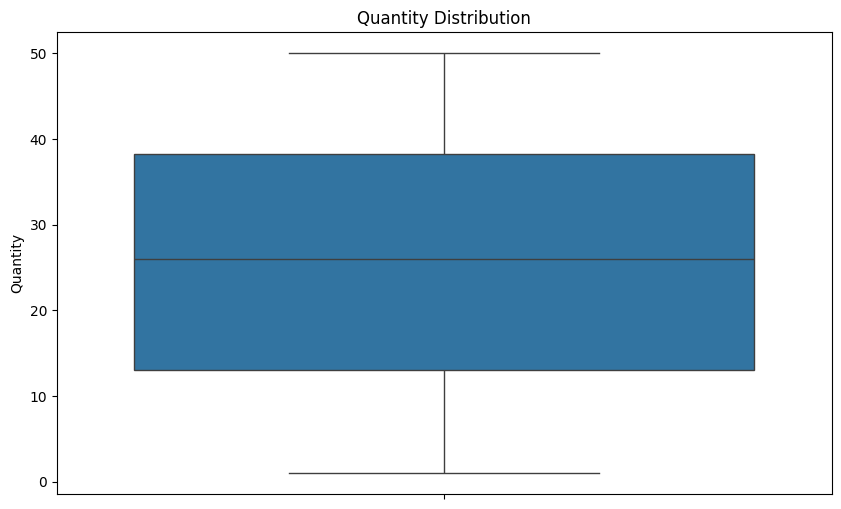

In [149]:
plt.figure(figsize=(10,6))
sns.boxplot(data=full_data, y ="Quantity")
plt.title("Quantity Distribution")
plt.show()

**Insights :**

* The box plot, the median of quantity is around 25.


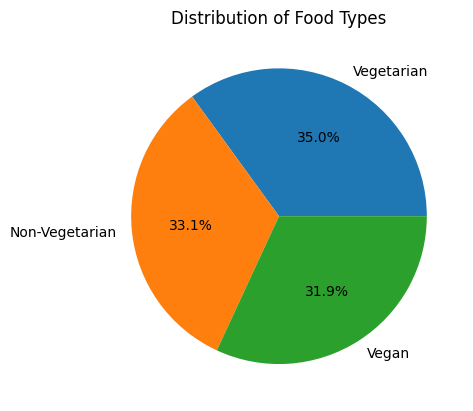

In [150]:
food_counts = full_data["Food_Type"].value_counts()
plt.pie( food_counts, labels=food_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Food Types")
plt.show()

**Insights :**

* Most Food type is vegetarian around 35%.


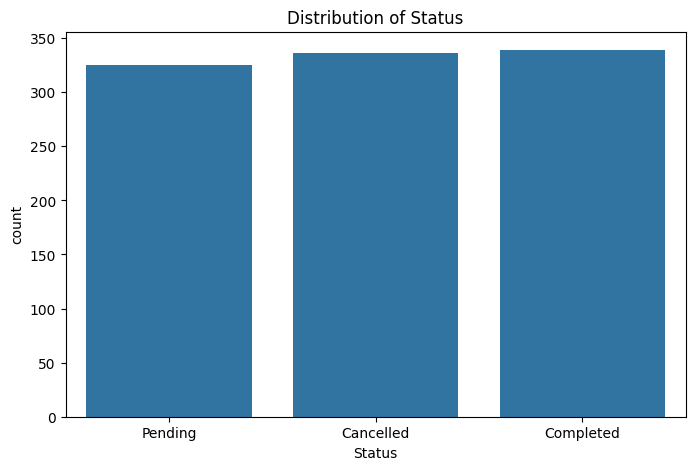

In [151]:
plt.figure(figsize=(8,5))
sns.countplot(data=full_data, x="Status")
plt.title("Distribution of Status")
plt.show()

**Insights :**

* Most of the status are completed. Pending, Cancelled, and Completed are almost equal in count.


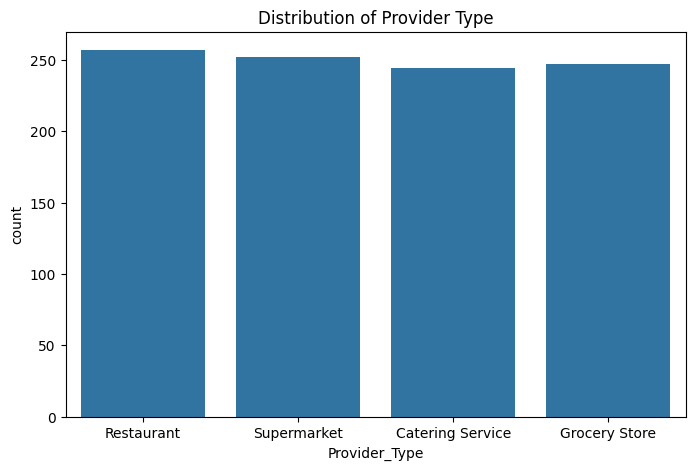

In [152]:
plt.figure(figsize=(8,5))
sns.countplot(data=full_data, x="Provider_Type")
plt.title("Distribution of Provider Type")
plt.show()

**Insights :**

* Restaurant is larger food provider.


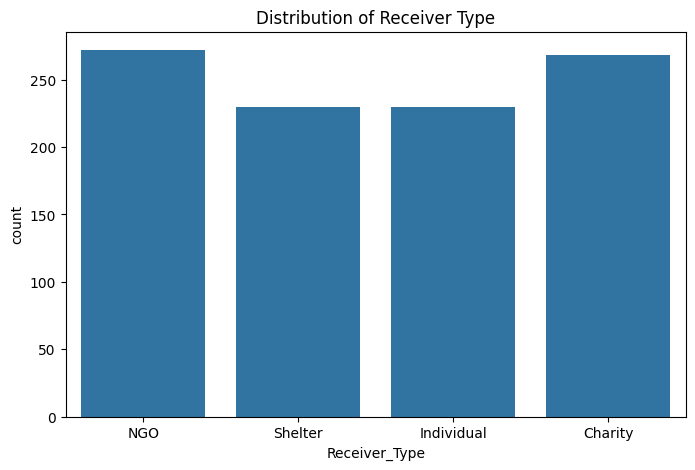

In [154]:
plt.figure(figsize=(8,5))
sns.countplot(data=full_data, x="Receiver_Type")
plt.title("Distribution of Receiver Type")
plt.show()

**Insights :**

* NGO are the most food receiver type.


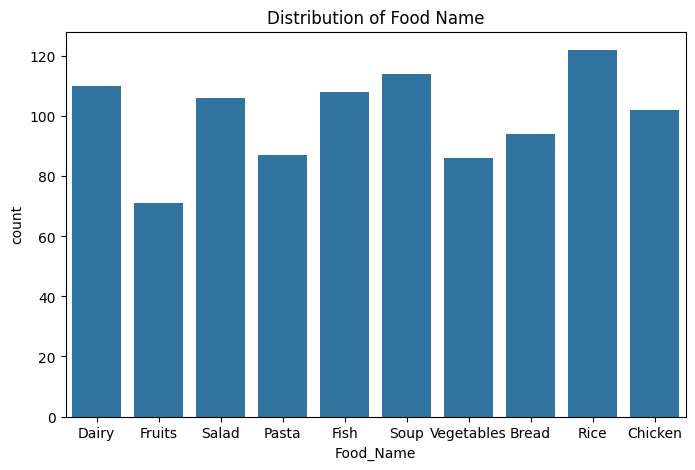

In [155]:
plt.figure(figsize=(8,5))
sns.countplot(data=full_data, x="Food_Name")
plt.title("Distribution of Food Name")
plt.show()

**Insights :**

* Rice is most available food item  and fruits are low .

# **Bivariate Analysis**

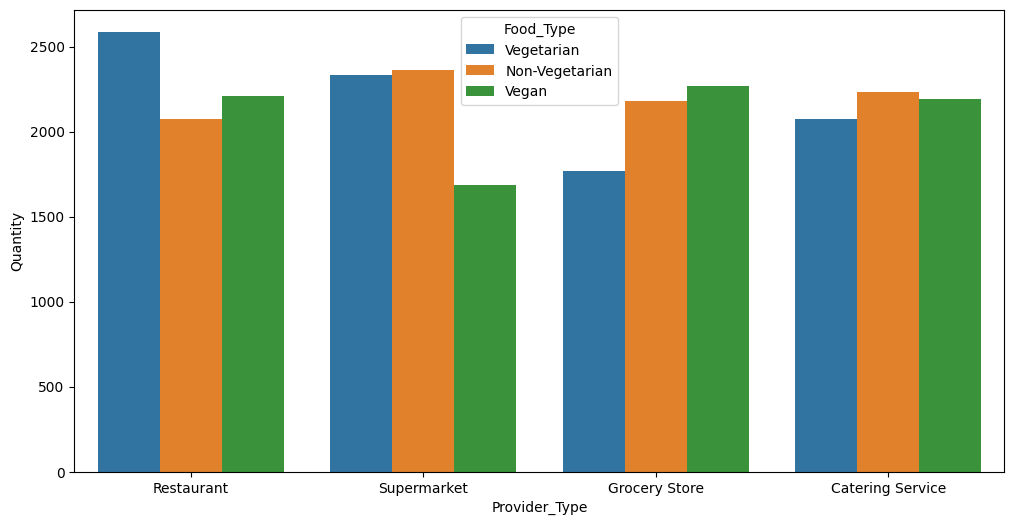

In [156]:
p1 = full_data.groupby(["Provider_Type","Food_Type"])["Quantity"].sum().reset_index().sort_values(by ="Quantity", ascending = False)
plt.figure(figsize =(12,6))
sns.barplot(data= p1, x= "Provider_Type" ,y= "Quantity", hue = "Food_Type", palette ="tab10")
plt.show()

**Insights :**

* Restaurants contribute the highest quantity of Vegetarian food.
* Supermarket contribute the highest quantity of Non-Vegetarian food.
* Grocery store contribute the highest quantity of Vegan food.


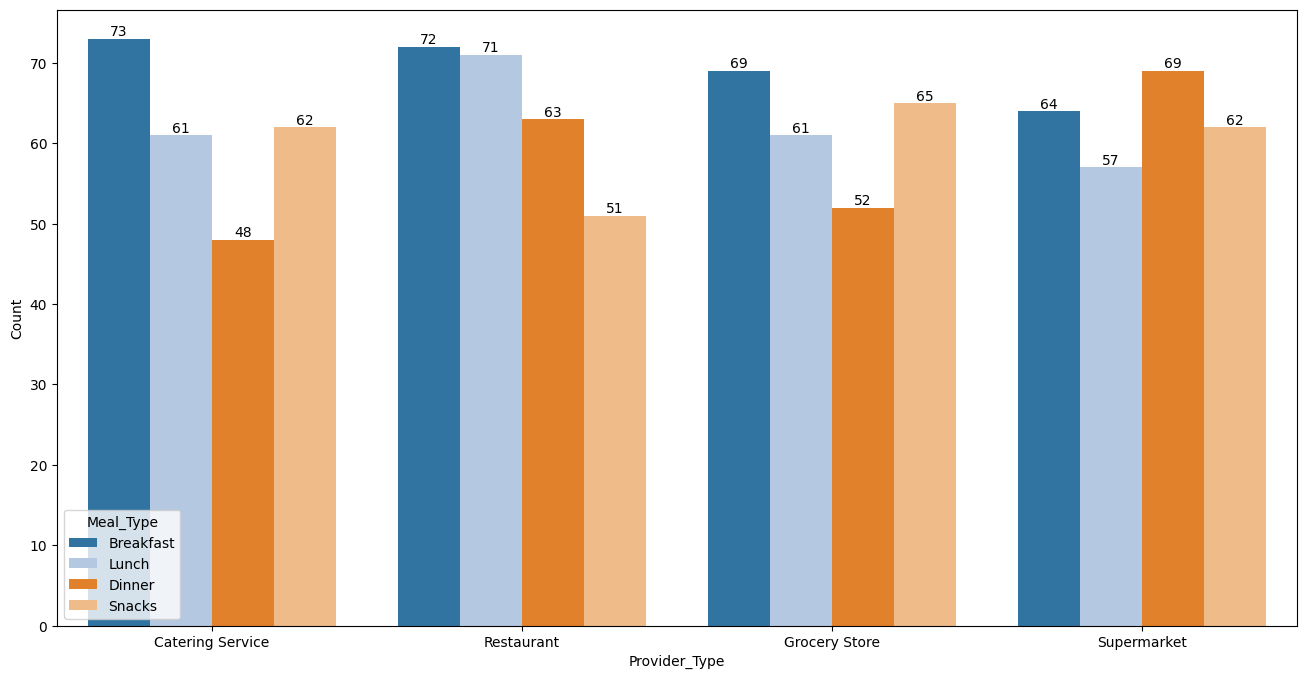

In [157]:
p2 = full_data.groupby(["Provider_Type","Meal_Type"])["Meal_Type"].count().reset_index(name = "Count").sort_values(by ="Count", ascending = False)
plt.figure(figsize =(16,8))
lb = sns.barplot(data= p2, x= "Provider_Type" ,y= "Count", hue = "Meal_Type", palette ="tab20")
for container in lb.containers:
    lb.bar_label(container, label_type="edge", fontsize=10)
plt.show()

**Insights :**

* Breakfast is the most common meal given by Catering, Restaurants, and Grocery Stores.

* Dinner is the most available meals in Supermarkets

* Supermarkets focus on Dinner, while Catering Services and Restaurants focus more on Breakfast and Lunch.

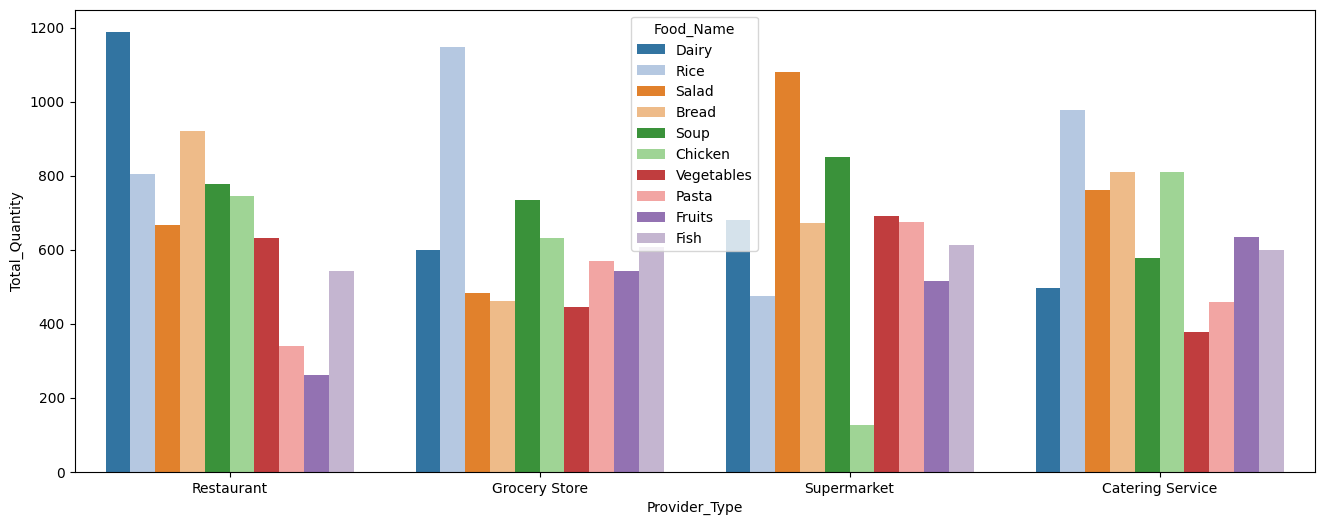

In [158]:
p3 = full_data.groupby(["Provider_Type","Food_Name"])["Quantity"].sum().reset_index(name = "Total_Quantity").sort_values(by ="Total_Quantity", ascending = False)
plt.figure(figsize =(16,6))
sns.barplot(data= p3, x= "Provider_Type" ,y= "Total_Quantity", hue = "Food_Name", palette ="tab20")
plt.show()

**Insights :**
* Restaurants mostly provide Dairy and Bread in high quantities.

* Supermarkets focus more on Salad and Soup.

* Catering Services and Grocery Stores provide Rice in high quantities.

# **Multivariate Analysis**

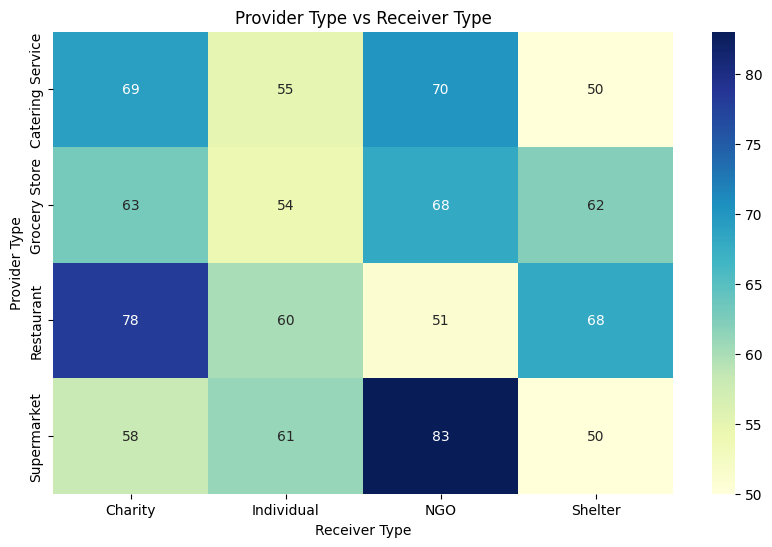

In [159]:
p4 = full_data.pivot_table(index="Provider_Type",columns="Receiver_Type", values="Provider_ID",aggfunc="count")
plt.figure(figsize=(10, 6))
sns.heatmap(p4, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Provider Type vs Receiver Type")
plt.xlabel("Receiver Type")
plt.ylabel("Provider Type")
plt.show()

**Insights :**

* Supermarkets mostly customer are NGOs.

* Restaurants give most charity.

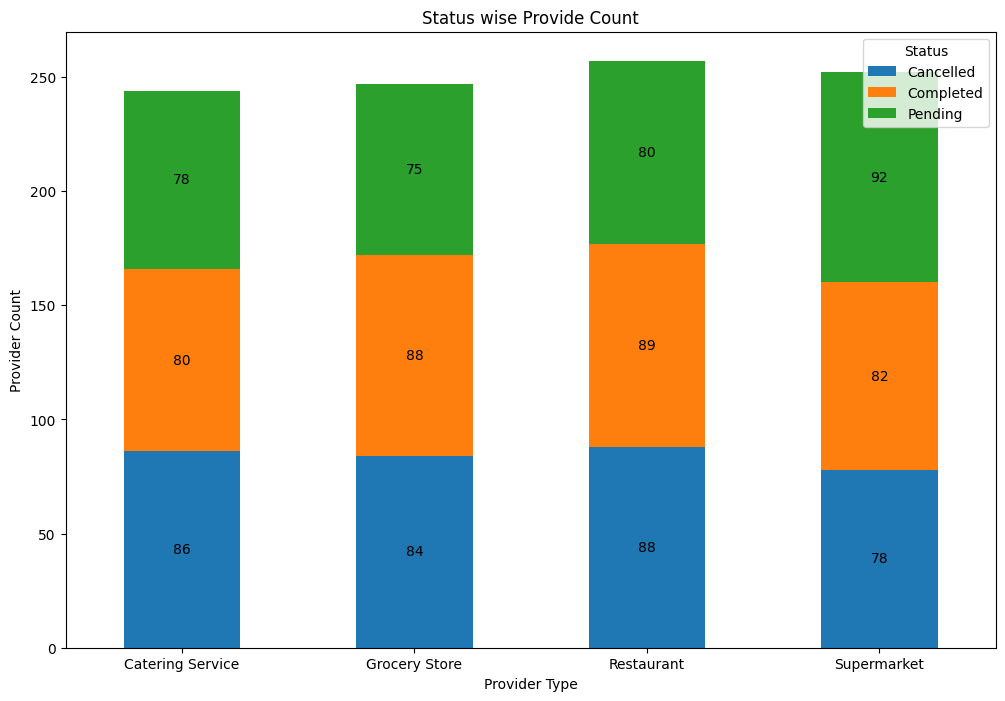

In [160]:
p5 = full_data.pivot_table(index="Provider_Type",columns="Status", values="Provider_ID",aggfunc="count")
lb = p5.plot(kind="bar", stacked=True, figsize=(12, 8))
lb.set_xticklabels(p5.index, rotation=0)
for container in lb.containers:
    lb.bar_label(container, label_type='center')
plt.title("Status wise Provide Count")
plt.xlabel("Provider Type")
plt.ylabel("Provider Count")
plt.show()

**Insights :**

* Restaurants have the highest Completed count (89) and Cancelled count(88).

* Supermarkets have the highest Pending count (92).

* Catering services and Grocery stores are more balanced across Cancelled, Completed, and Pending.

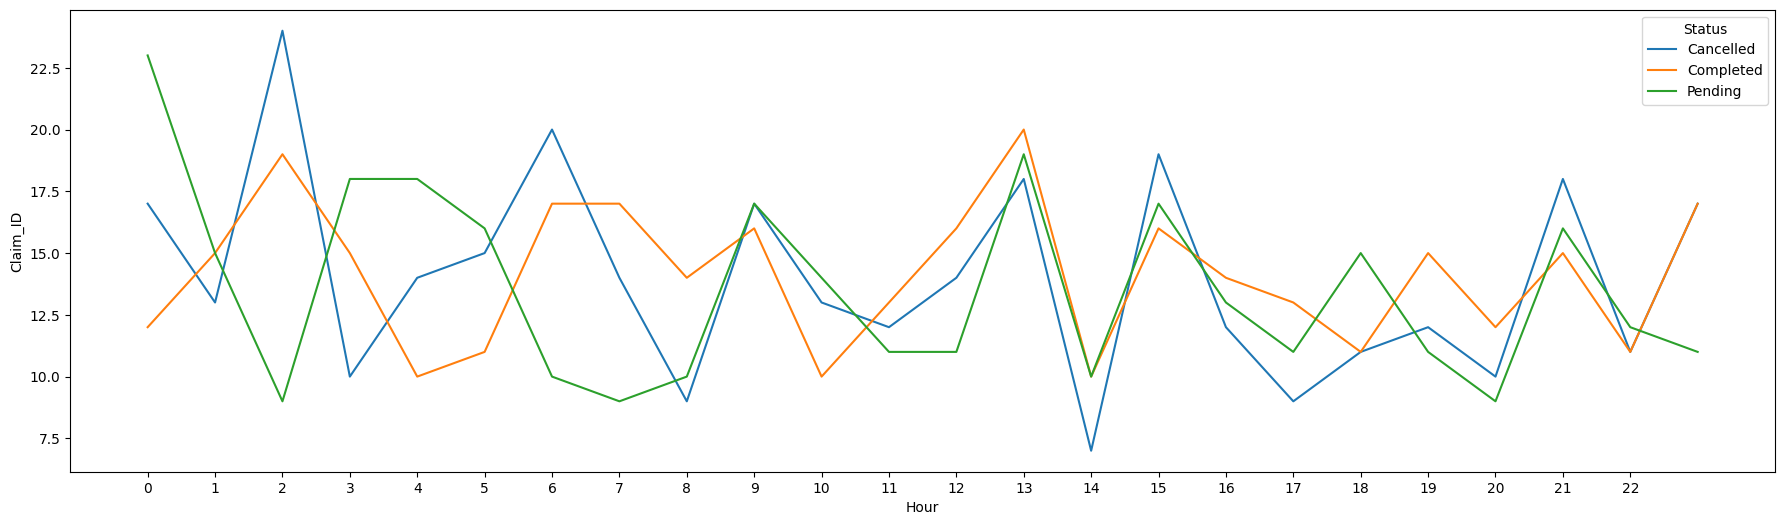

In [161]:
p8 = full_data.groupby(["Hour","Status"])["Claim_ID"].count().reset_index()
plt.figure(figsize=(22,6))
sns.lineplot(data= p8, x="Hour", y="Claim_ID", hue="Status")
plt.xticks(range(0, 23))
plt.show()

**Insights :**

* Morning peaks (around 2–3 AM) – Cancelled claims are highest around 2 AM, while Pending also shows a sharp drop and rise in this period.

* Midday stability (10 AM – 3 PM) – Completed claims are higher.

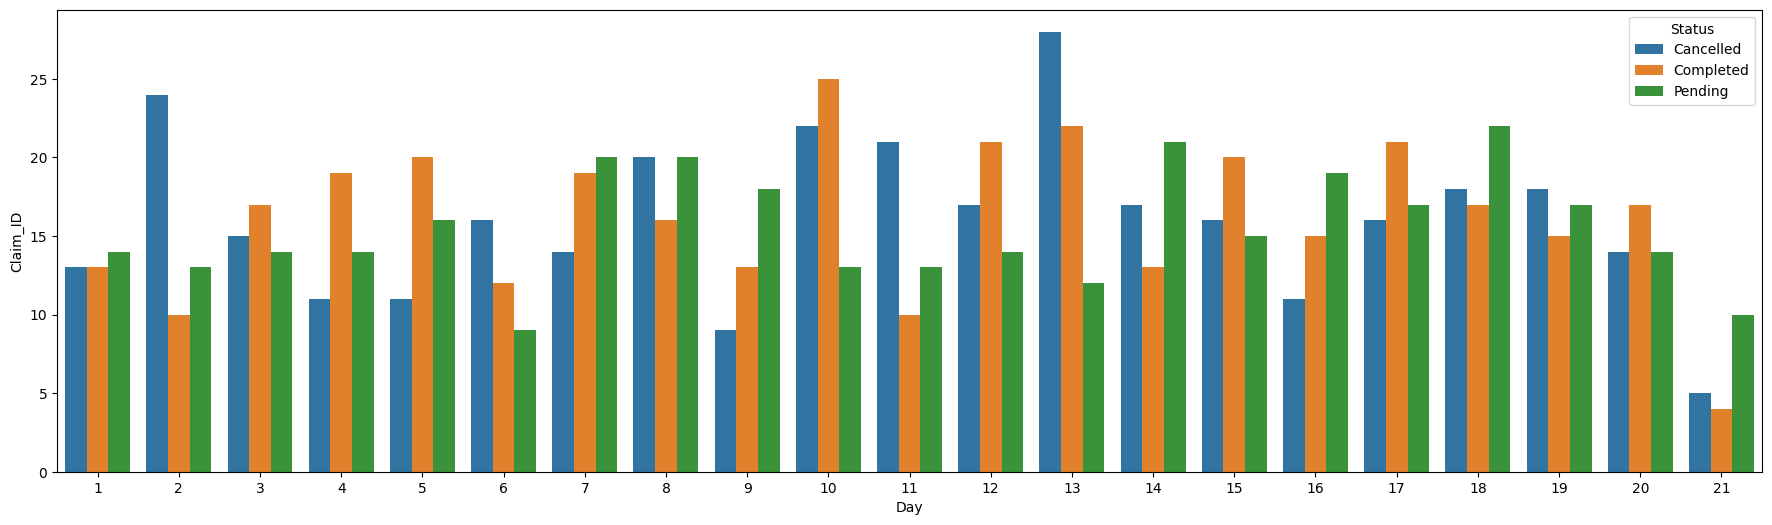

In [162]:
p9 = full_data.groupby(["Day","Status"])["Claim_ID"].count().reset_index()
plt.figure(figsize=(22,6))
sns.barplot(data= p9, x="Day", y="Claim_ID", hue="Status", palette="tab10")
plt.show()

**Insights :**

* Completed claims are generally higher than cancelled or pending ones on most days.

* Day 2, Day 13 have high cancellations  which may indicate issues that need fixing.

* Pending claims are steady across most days.

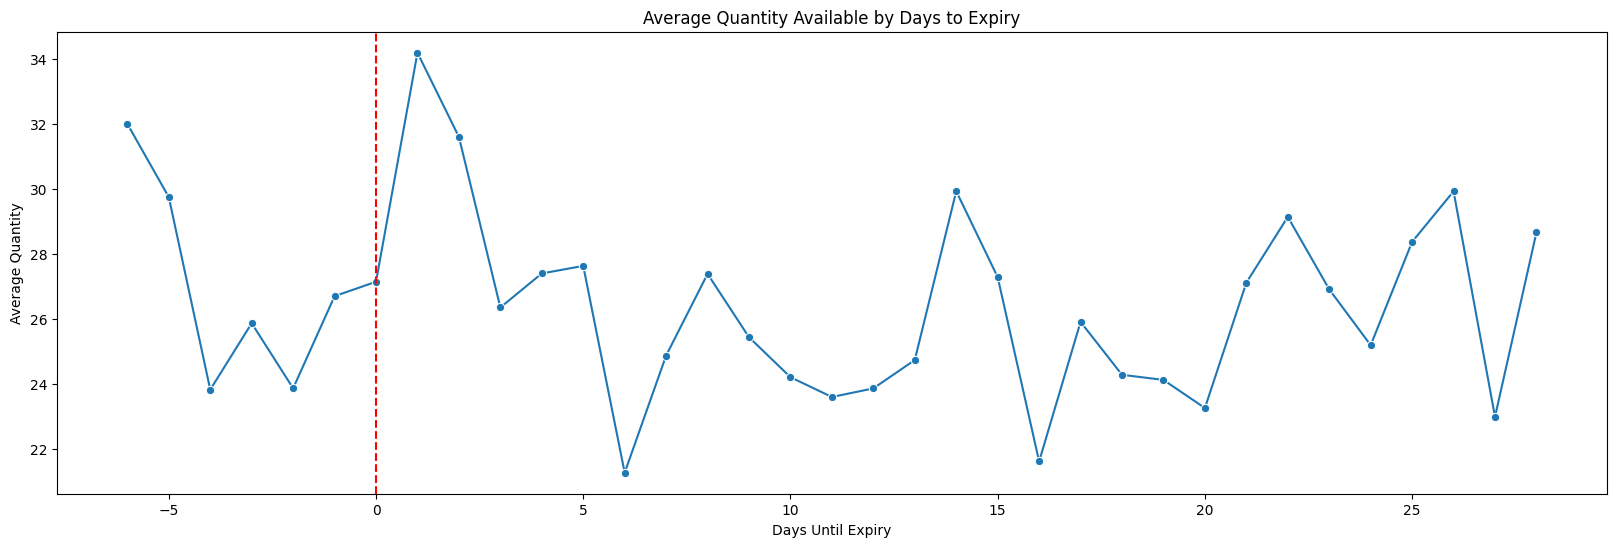

In [163]:
p17 = full_data.groupby(["Days_To_Expiry"])["Quantity"].mean().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(data=p17, x="Days_To_Expiry", y="Quantity", marker = "o")
plt.title("Average Quantity Available by Days to Expiry")
plt.axvline(x=0, color="red", linestyle="--", label="Expiry Date")
plt.xlabel("Days Until Expiry")
plt.ylabel("Average Quantity")
plt.show()

**Insights :**

* Expiry Date Reference – The red dashed line at x=0 marks the expiry date. Quantities are tracked before and after this point.

* High Fluctuations Near Expiry – Just before and right after expiry, the average quantity available shows sharp rises and falls, meaning stock levels are unstable near expiry.

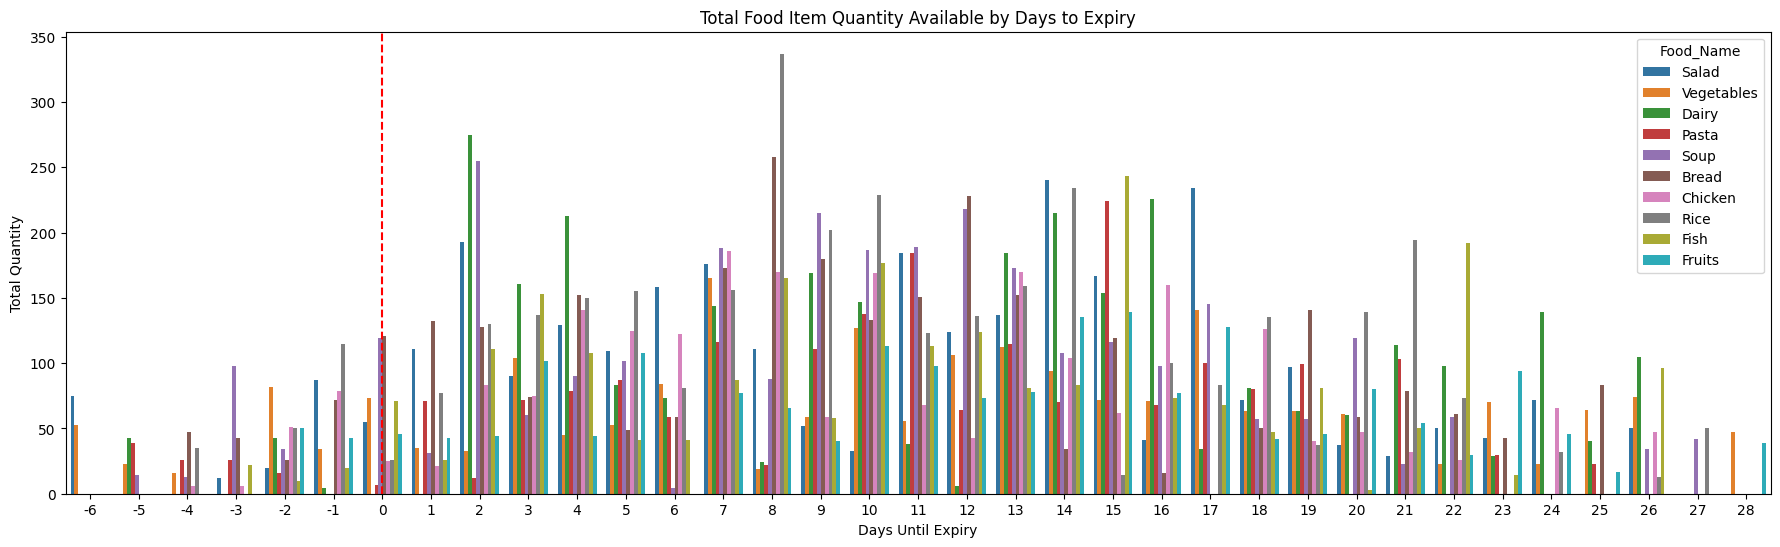

In [164]:
p18 = full_data.groupby(["Food_Name","Days_To_Expiry"])["Quantity"].sum().reset_index()
plt.figure(figsize=(22,6))
sns.barplot(data=p18, x="Days_To_Expiry", y="Quantity", hue = "Food_Name")
plt.title("Total Food Item Quantity Available by Days to Expiry")
plt.axvline(x=6, color="red", linestyle="--", label="Expiry Date")
plt.xlabel("Days Until Expiry")
plt.ylabel("Total Quantity")
plt.show()

**Insights :**

* Low Quantities Before Expiry – In the days leading up to expiry (negative days), total quantities of food items are generally low.

* Higher and Mixed Quantities After Expiry – After expiry (positive days), the total quantities across different foods rise sharply and vary a lot, with some items (like vegetables, rice, and fruits) showing large spikes.

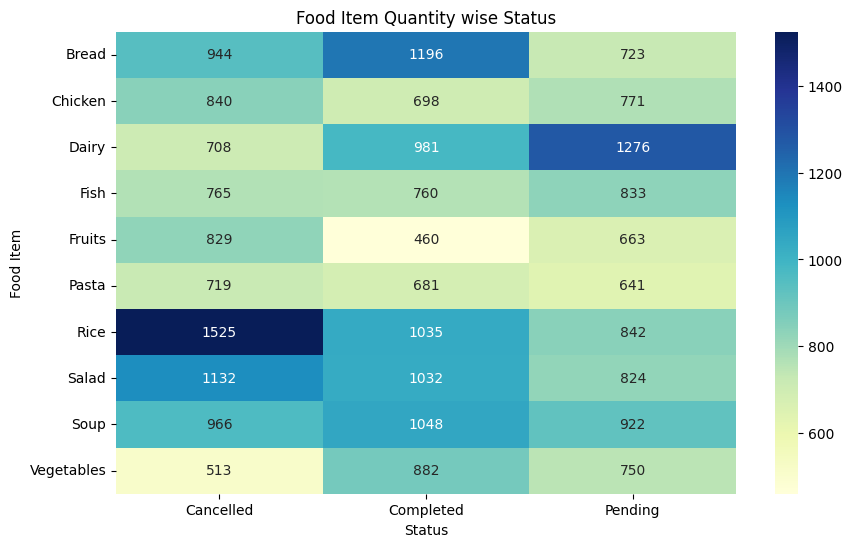

In [165]:
p12 = full_data.pivot_table(index="Food_Name",columns="Status", values="Quantity",aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(p12, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Food Item Quantity wise Status")
plt.xlabel("Status")
plt.ylabel("Food Item")
plt.show()

**Insights :**

* Rice (1525 cancelled, 1035 completed) and Salad (1132 cancelled, 1032 completed) have the highest overall quantities compared to other foods.

* Dairy has the highest pending quantity (1276).

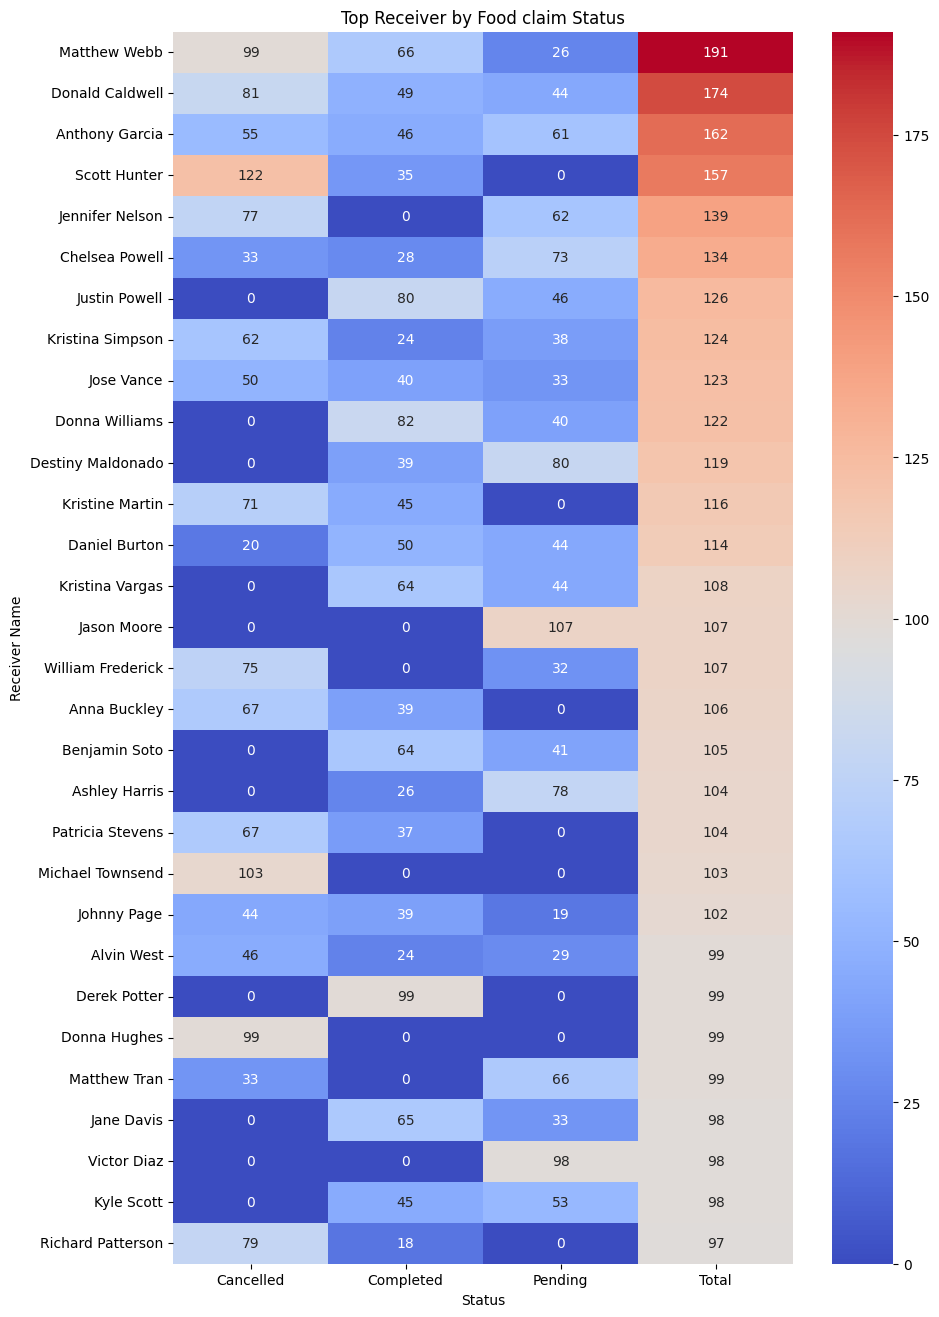

In [166]:
p13 = full_data.pivot_table(index="Receiver_Name",columns="Status", values="Quantity",aggfunc="sum").fillna(0)
p13["Total"] = p13.sum(axis=1)
p14 = p13.sort_values(by = "Total", ascending = False).head(30)
plt.figure(figsize=(10, 16))
sns.heatmap(p14, annot=True,  fmt='.0f',cmap='coolwarm')
plt.title("Top Receiver by Food claim Status")
plt.xlabel("Status")
plt.ylabel("Receiver Name")
plt.show()

**Insights :**

* Matthew Webb is the top receiver – He has the highest total claims (191).

* Scott Hunter has the highest cancellations – With 122 cancelled claims.

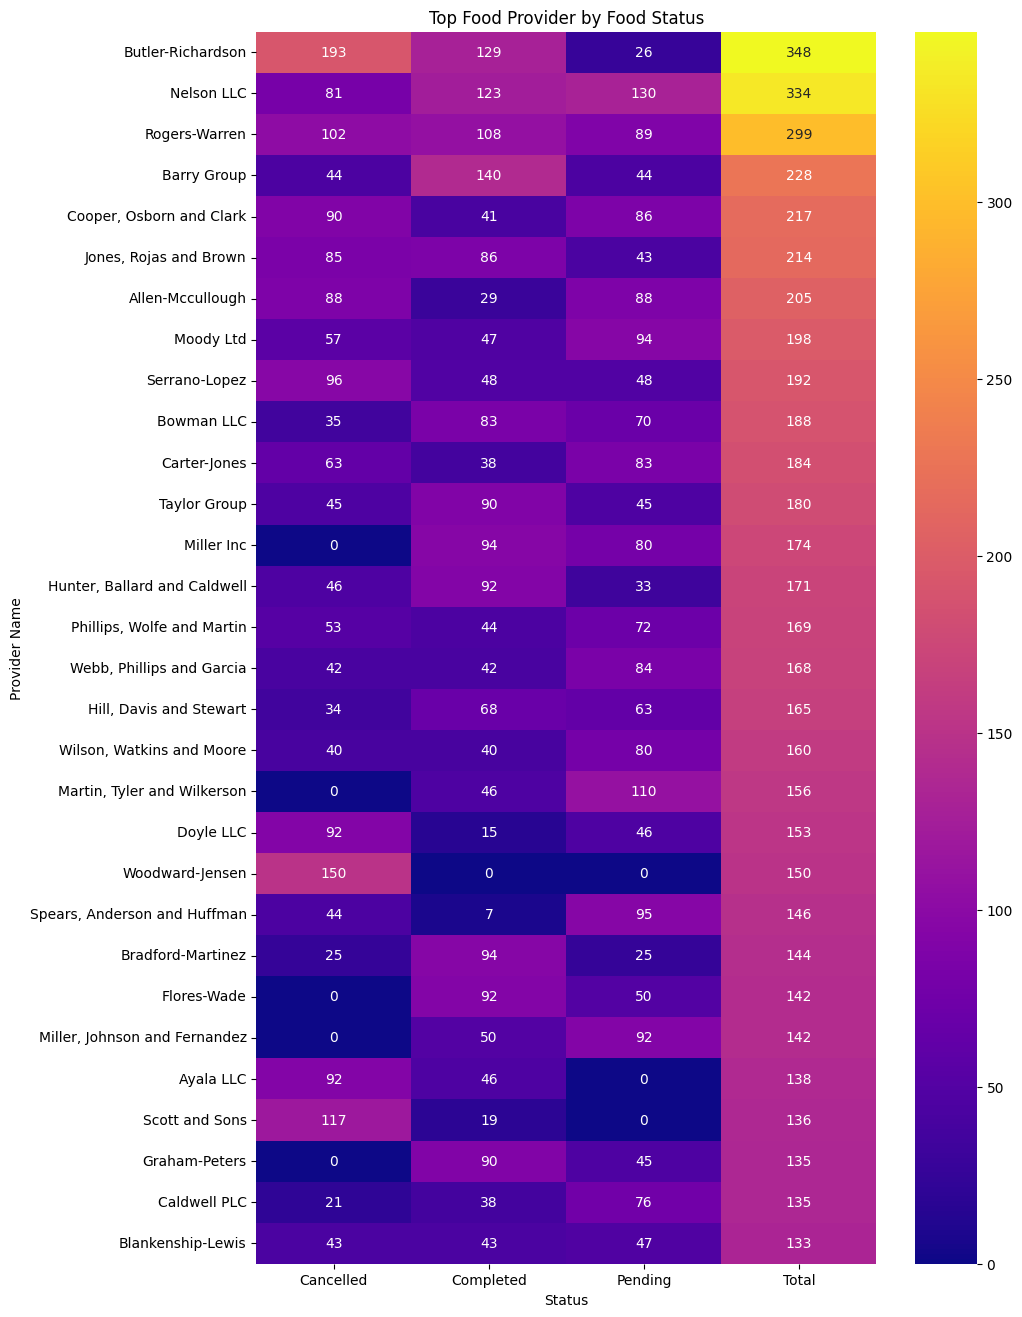

In [167]:
p15 = full_data.pivot_table(index="Provider_Name",columns="Status", values="Quantity",aggfunc="sum").fillna(0)
p15["Total"] = p15.sum(axis=1)
p16 = p15.sort_values(by = "Total", ascending = False).head(30)
plt.figure(figsize=(10, 16))
sns.heatmap(p16, annot=True,  fmt='.0f',cmap='plasma')
plt.title("Top Food Provider by Food Status")
plt.xlabel("Status")
plt.ylabel("Provider Name")
plt.show()

**Insights :**

* Butler-Richardson is the biggest food provider overall, with the highest total (348) and also have highest cancel food status.

* Nelson LLC has highest (130) food pending status.

* Nelson LLC has highest (140) food completed status.

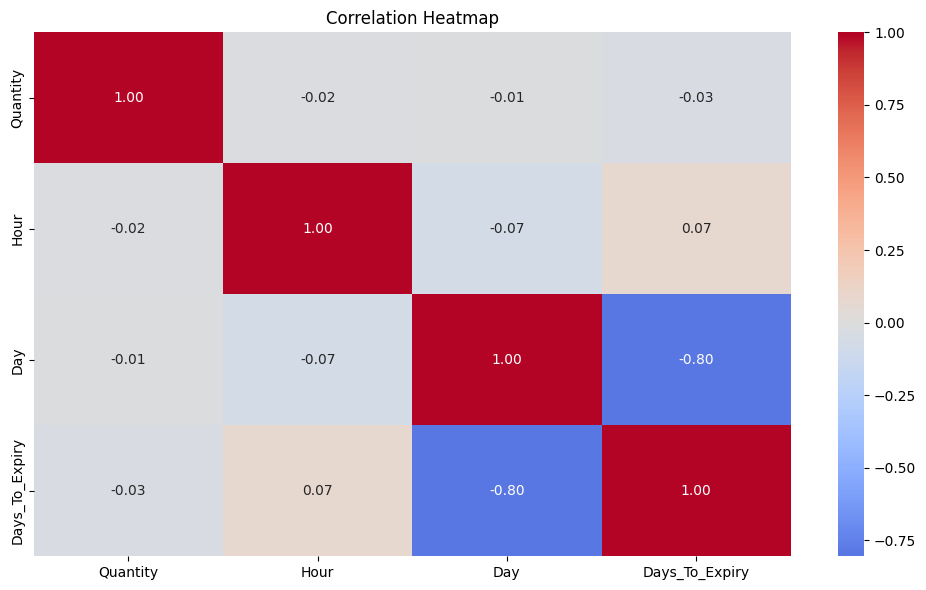

In [168]:
num_cols = ["Quantity","Hour","Day","Days_To_Expiry"]
corr = full_data[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Insights :**

* Day and Days_to_Expiry have a strong negative correlation (-0.80) because as days pass, the remaining days to expiry go down.

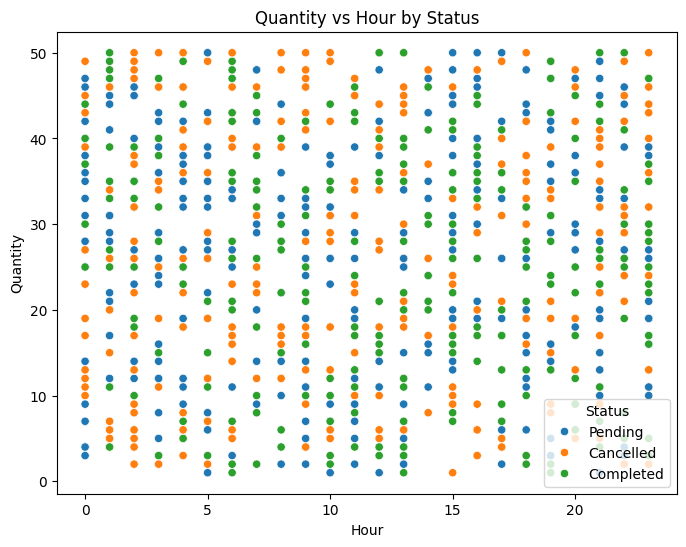

In [169]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=full_data, x="Hour", y="Quantity", hue="Status")
plt.title("Quantity vs Hour by Status")
plt.show()


**Insights :**

* Quantities are spread across all hours, meaning customers place orders at almost every hour of the day.

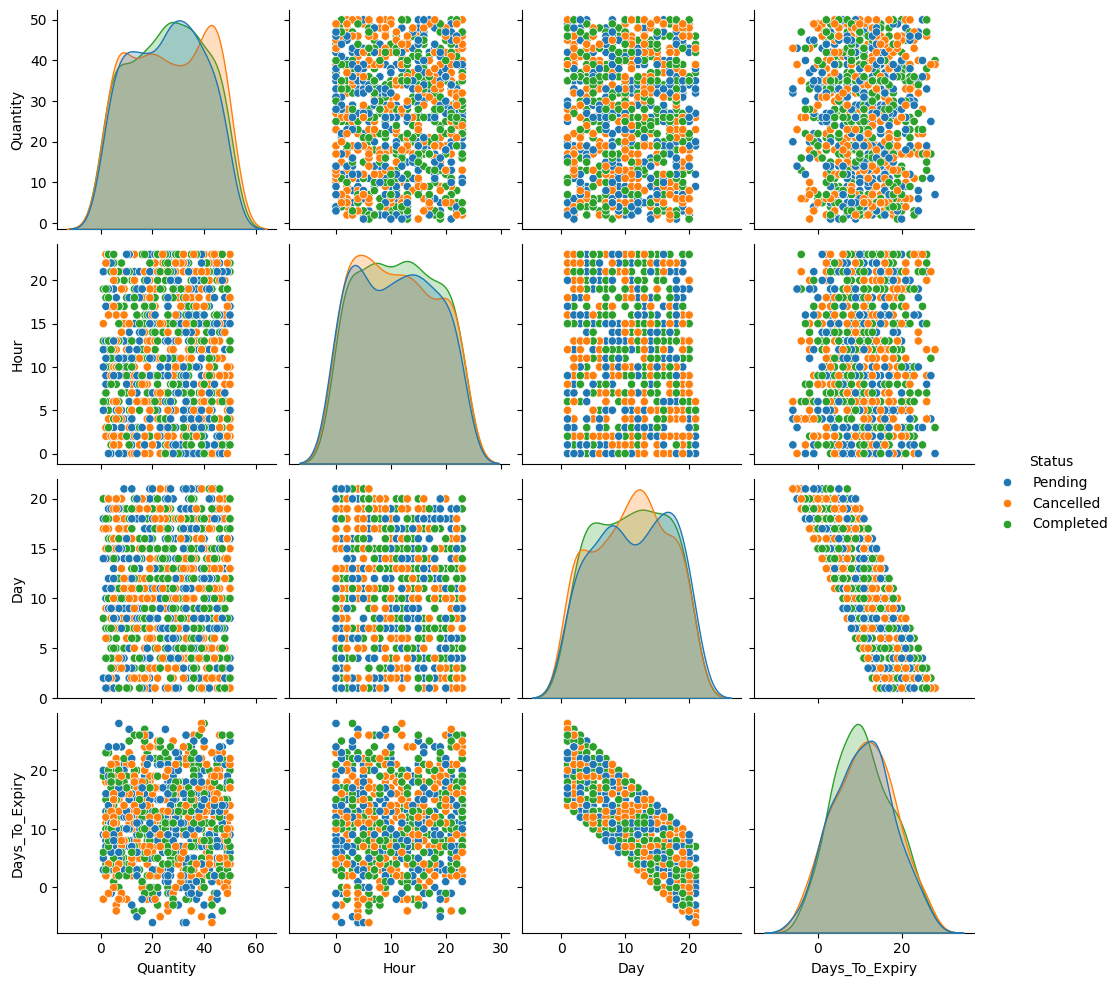

In [170]:
num_cols = ["Quantity", "Hour", "Day","Days_To_Expiry"]
sns.pairplot(full_data[num_cols + ["Status"]], hue="Status", diag_kind="kde", height=2.5)
plt.show()

**Insights :**

* Quantities cluster around 30–50 units – Most orders fall in this range, regardless of status.

# **Solution to Business Objective**

* Match demand with supply – Track which foods are most needed and ensure providers supply those items regularly.

* Improve claim process – Reduce cancelled and pending claims by automating approvals and quick verification.

* Efficient distribution – Plan deliveries based on high-demand receivers to make sure food reaches faster.

* Improve donation completion → Give clear pickup schedules and reminders to reduce pending and cancelled donations.

* Engage supermarkets more → Train and motivate supermarkets since they have high pending cases.

* Strengthen partnerships → Work closely with NGOs and charities as they are the biggest and most consistent receivers.

* Reduce cancellations – Find main reasons (like late delivery or stock shortage) and fix them to improve customer trust.

* Improve stock planning – Keep more medium-quantity stock (30–50 units) ready, since most orders fall in this range.

* Balance staff across hours – Since orders come all day, keep delivery staff available in shifts to avoid delays.

* Use expiry discounts – Offer deals on items close to expiry to cut waste and increase sales.




# **Conclusion**

* Customer demand is consistent – Orders are spread across hours and days, showing steady food demand.

* Order sizes are predictable – Most orders fall within a medium range (30–50 units).

* Order status is mixed – Pending, Completed, and Cancelled orders look similar, meaning many factors affect final status.

* Expiry date has limited effect – Items are still ordered even when close to expiry, so expiry is not the main concern.

* Restaurants are the most reliable donors, with high completed donations.

* Supermarkets need improvement, as they have the most pending cases.

* Charities and NGOs receive the most food, meaning they are the biggest beneficiaries.

# **Queries**

In [171]:
# 1. How many food providers and receivers in each city?

d1 = provider.groupby("Provider_City")["Provider_ID"].nunique().reset_index().sort_values(by ="Provider_ID", ascending = False)
d2 = receiver.groupby("Receiver_City")["Receiver_ID"].nunique().reset_index().sort_values(by ="Receiver_ID", ascending = False)
print(d1), print(d2)

                Provider_City  Provider_ID
472                 New Carol            3
773  South Christopherborough            3
841                 Tammyside            2
147              East Anthony            2
467                New Amanda            2
..                        ...          ...
330            Lake Coryhaven            1
331              Lake Deborah            1
332        Lake Dennischester            1
333                Lake Devon            1
318                Lake April            1

[963 rows x 2 columns]
       Receiver_City  Receiver_ID
475  New Christopher            3
736        Robertton            2
851      Stevenmouth            2
942     West Richard            2
917       West James            2
..               ...          ...
332     Lake Clinton            1
333        Lake Cody            1
334        Lake Cory            1
335     Lake Crystal            1
321         Kirkfort            1

[966 rows x 2 columns]


(None, None)

In [172]:
# 2. Which type of food provider contributes the most food?

d3 = foodlist.groupby("Provider_Type")["Quantity"].sum().reset_index(name="claim_food_count").sort_values(by="claim_food_count", ascending=False).head(5)
d3

,Provider_Type,claim_food_count
2,Restaurant,6923
3,Supermarket,6696
0,Catering Service,6116
1,Grocery Store,6059


In [173]:
# 3. Contact information of food providers in a specific city

d4 = full_data.groupby(["Provider_City" , "Provider_Name"])["Provider_Contact"].unique().reset_index()
d4[d4["Provider_City"] == "Adambury"]

,Provider_City,Provider_Name,Provider_Contact
0,Adambury,Ibarra LLC,[6703380260]


In [174]:
# 4. Which receivers have claimed the most food?

d5 = full_data.groupby("Receiver_Name")["Quantity"].sum().reset_index(name="claim_food_count").sort_values(by="claim_food_count", ascending=False).head(5)
d5

,Receiver_Name,claim_food_count
413,Matthew Webb,191
172,Donald Caldwell,174
51,Anthony Garcia,162
537,Scott Hunter,157
260,Jennifer Nelson,139


In [175]:
# 5. Total quantity of food available from all providers ?

d7 = foodlist["Quantity"].sum()
d7

np.int64(25794)

In [176]:
# 6. Which city has the highest number of food listings?

d8 = foodlist.groupby("Location")["Food_ID"].count().reset_index(name="food_count").sort_values(by="food_count", ascending=False).head(3)
d8

,Location,food_count
518,South Kathryn,6
308,New Carol,6
182,Jimmyberg,5


In [177]:
# 7. What are the most commonly available food types?

d9 = foodlist["Food_Type"].value_counts().reset_index(name="Food_Type_count")
d9

,Food_Type,Food_Type_count
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330


In [178]:
# 8. How many food claims have been made for each food item?

d10 = full_data.groupby("Food_Name")["Claim_ID"].count().reset_index(name = "Claim_count").sort_values(by="Claim_count", ascending =False)
d10

,Food_Name,Claim_count
6,Rice,122
8,Soup,114
2,Dairy,110
3,Fish,108
7,Salad,106
1,Chicken,102
0,Bread,94
5,Pasta,87
9,Vegetables,86
4,Fruits,71


In [179]:
# 9. Which provider has had the highest number of successful food claims?

d11 = full_data[full_data["Status"] == "Completed"]
d12 = d11.groupby("Provider_Name")["Claim_ID"].count().reset_index(name="Claim_count").sort_values(by="Claim_count", ascending =False).head(1)
d12

,Provider_Name,Claim_count
15,Barry Group,5


In [180]:
# 10. What percentage of food claims are completed vs. pending vs. canceled?

d13 = claim["Status"].value_counts()
d14 = ((d13 / len(claim)) * 100).reset_index(name="Percentage")
d14

,Status,Percentage
0,Completed,33.9
1,Cancelled,33.6
2,Pending,32.5


In [181]:
#  11. What is the average quantity of food claimed per receiver?

d15 = round(full_data.groupby("Receiver_Name")["Quantity"].mean(),2).reset_index(name="Average_quantity")
d15

,Receiver_Name,Average_quantity
0,Aaron Keller,39.00
1,Aaron Rios,21.00
2,Aaron Scott,45.00
3,Abigail Crawford,25.67
4,Adam Browning,5.00
...,...,...
615,William Barnes,47.00
616,William Fox,12.00
617,William Frederick,21.40
618,Yvette Huffman,45.00


In [182]:
# 12. Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

d16 = full_data["Meal_Type"].value_counts().reset_index(name="Claims_Count")
d16

,Meal_Type,Claims_Count
0,Breakfast,278
1,Lunch,250
2,Snacks,240
3,Dinner,232


In [183]:
# 13. What is the total quantity of food donated by each provider?
d17 = pd.merge(foodlist, provider, on = "Provider_ID", how ="inner")
d18 = d17.groupby("Provider_Name")["Quantity"].sum().reset_index(name="Total_Quantity").sort_values(by ="Total_Quantity", ascending = False)
d18

,Provider_Name,Total_Quantity
356,Miller Inc,217
42,Barry Group,179
161,"Evans, Wright and Mitchell",158
530,Smith Group,150
88,Campbell LLC,145
...,...,...
463,Reyes and Sons,1
402,Norris-Townsend,1
338,"Martinez, Armstrong and Carroll",1
203,Gonzales-Moore,1
